In [1]:
import pandas as pd

# --- Step 1: Read tweets file ---
tweet_ids = []
tweet_texts = []

with open(r"F:\pbl research\new research paper\Sarcasm_tweets.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]
    for i in range(0, len(lines), 2):
        tweet_ids.append(lines[i])
        tweet_texts.append(lines[i + 1])

tweets_df = pd.DataFrame({"tweet_id": tweet_ids, "text": tweet_texts})

# --- Step 2: Read labels file ---
label_ids = []
labels = []

with open(r"F:\pbl research\new research paper\Sarcasm_tweet_truth.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]
    for i in range(0, len(lines), 2):
        label_ids.append(lines[i])
        labels.append(lines[i + 1])

labels_df = pd.DataFrame({"tweet_id": label_ids, "label": labels})

# --- Step 3: Merge and save
merged = pd.merge(tweets_df, labels_df, on="tweet_id")
merged.to_csv(r"F:\pbl research\new research paper\Sarcasm_combined.csv", index=False, encoding="utf-8")

print("✅ Combined dataset created successfully!")

✅ Combined dataset created successfully!


In [2]:
df = pd.read_csv(r"F:\pbl research\new research paper\Sarcasm_combined.csv")
print(df.head())

             tweet_id                                               text label
0  866871160725794816          Triple Talaq par Burbak Kuchh nahi bolega    NO
1  880356789358743553  Batao ye uss site pr se akki sir ke verdict ni...   YES
2  877751493889105920  Hindu baheno par julam bardas nahi hoga @Tripl...    NO
3  901806457871466496  Naa bhai.. aisa nhi hai.. mere handle karne se...    NO
4  866264330748219392  #RememberingRajiv aaj agar musalman auraten tr...    NO


In [3]:
df["label"] = df["label"].map({"YES": 1, "NO": 0})


In [4]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Show column names
print("Columns:", df.columns.tolist())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display few samples
df.head()

Dataset Shape: (5250, 3)
Columns: ['tweet_id', 'text', 'label']

Missing Values:
tweet_id    0
text        0
label       0
dtype: int64


,tweet_id,text,label
0,866871160725794816,Triple Talaq par Burbak Kuchh nahi bolega,0
1,880356789358743553,Batao ye uss site pr se akki sir ke verdict ni...,1
2,877751493889105920,Hindu baheno par julam bardas nahi hoga @Tripl...,0
3,901806457871466496,Naa bhai.. aisa nhi hai.. mere handle karne se...,0
4,866264330748219392,#RememberingRajiv aaj agar musalman auraten tr...,0


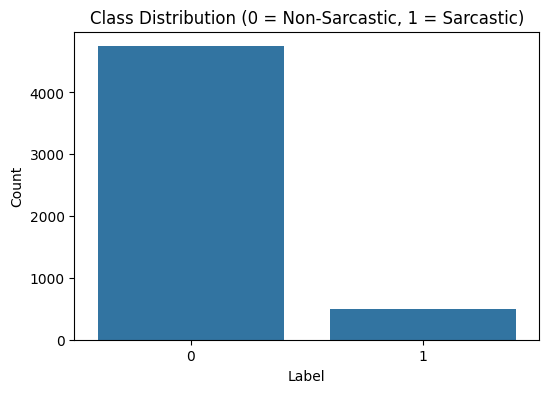

label
0    4746
1     504
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Class Distribution (0 = Non-Sarcastic, 1 = Sarcastic)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

print(df['label'].value_counts())

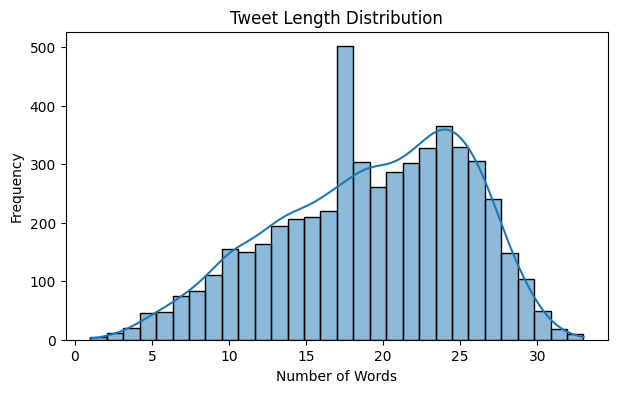

count    5250.000000
mean       19.232762
std         6.170647
min         1.000000
25%        15.000000
50%        20.000000
75%        24.000000
max        33.000000
Name: text_length, dtype: float64

In [6]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(7,4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

df['text_length'].describe()

In [7]:
from collections import Counter
import re

def tokenize(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

all_tokens = df['text'].apply(tokenize)

counter = Counter()
for tokens in all_tokens:
    counter.update(tokens)

common_words = counter.most_common(20)
common_words

[('hai', 3734),
 ('ki', 1890),
 ('ko', 1542),
 ('politics', 1518),
 ('ke', 1410),
 ('bhi', 1245),
 ('se', 1244),
 ('to', 1169),
 ('aur', 1168),
 ('cricket', 1134),
 ('ka', 1122),
 ('ho', 1053),
 ('nahi', 1026),
 ('talaq', 1025),
 ('me', 980),
 ('triple', 956),
 ('k', 702),
 ('ye', 681),
 ('hi', 656),
 ('bollywood', 598)]

In [8]:
def get_top_words(class_label, n=15):
    text = " ".join(df[df['label']==class_label]['text'])
    tokens = tokenize(text)
    counts = Counter(tokens)
    return counts.most_common(n)

print("Top words for NON-SARCASTIC:")
print(get_top_words(0))

print("\nTop words for SARCASTIC:")
print(get_top_words(1))

Top words for NON-SARCASTIC:
[('hai', 3406), ('ki', 1730), ('politics', 1517), ('ko', 1433), ('ke', 1291), ('bhi', 1160), ('se', 1157), ('cricket', 1134), ('to', 1083), ('aur', 1052), ('ka', 1037), ('talaq', 1025), ('ho', 979), ('triple', 956), ('nahi', 942)]

Top words for SARCASTIC:
[('hai', 328), ('irony', 299), ('sarcasm', 188), ('ki', 160), ('ke', 119), ('aur', 116), ('ko', 109), ('hain', 102), ('se', 87), ('to', 86), ('bhi', 85), ('ka', 85), ('nahi', 84), ('ho', 74), ('mein', 65)]


In [9]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove links
    text = re.sub(r"@\w+|#\w+", "", text)                # remove mentions/hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)              # remove punctuation/numbers
    text = text.lower().strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)


In [10]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to normalize elongated words (ex: soooo → soo)
def reduce_elongated(word):
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (#word → word)
    text = re.sub(r'#', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    words = text.split()
    
    cleaned_tokens = []
    for w in words:
        # Reduce elongated words (ex: "goooood" → "good")
        w = reduce_elongated(w)
        
        # Remove stopwords
        if w not in stop_words:
            # Lemmatize
            w = lemmatizer.lemmatize(w)
            cleaned_tokens.append(w)
    
    return " ".join(cleaned_tokens)

# Apply preprocessing to your dataset
df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text"]].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charvi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Charvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,Triple Talaq par Burbak Kuchh nahi bolega,triple talaq par burbak kuchh nahi bolega
1,Batao ye uss site pr se akki sir ke verdict ni...,batao ye us site pr se akki sir ke verdict nik...
2,Hindu baheno par julam bardas nahi hoga @Tripl...,hindu baheno par julam bardas nahi hoga hindu ...
3,Naa bhai.. aisa nhi hai.. mere handle karne se...,naa bhai aisa nhi hai mere handle karne se bhi...
4,#RememberingRajiv aaj agar musalman auraten tr...,rememberingrajiv aaj agar musalman auraten tri...


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42,stratify=df["label"])

# Check class distribution after split
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())


Training set class distribution:
 label
0    3797
1     403
Name: count, dtype: int64
Testing set class distribution:
 label
0    949
1    101
Name: count, dtype: int64


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


📌 Logistic Regression Results:
Training Accuracy: 0.93
Testing Accuracy: 0.919047619047619

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       949
           1       0.67      0.31      0.42       101

    accuracy                           0.92      1050
   macro avg       0.80      0.65      0.69      1050
weighted avg       0.91      0.92      0.91      1050



Confusion Matrix




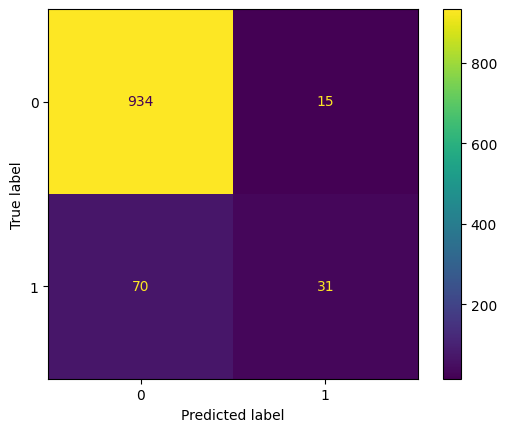

In [13]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Predictions
y_train_pred_lr = model.predict(X_train_vec)  # training predictions
y_test_pred_lr= model.predict(X_test_vec)    # testing predictions

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
log_reg_acc = test_accuracy


print("📌 Logistic Regression Results:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report for test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_lr, zero_division=0))
print("\n")


print("Confusion Matrix")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)
print("\n")


📌 Support Vector Machine (SVM) Results:
Training Accuracy: 0.9840
Testing Accuracy: 0.9429

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       949
           1       0.75      0.60      0.67       101

    accuracy                           0.94      1050
   macro avg       0.86      0.79      0.82      1050
weighted avg       0.94      0.94      0.94      1050



Confusion Matrix




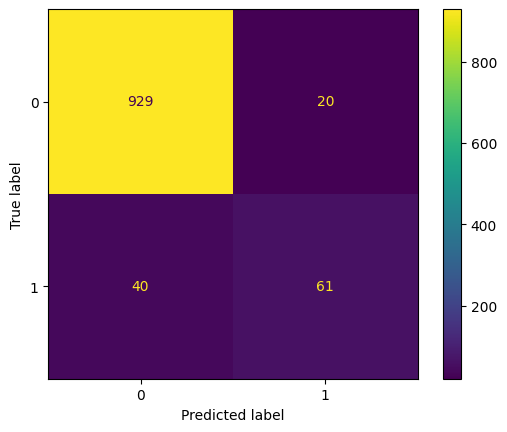

In [14]:
#svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_vec, y_train)

# Predict on training and test data
y_train_pred_svm = svm_model.predict(X_train_vec)
y_test_pred_svm = svm_model.predict(X_test_vec)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_svm)
test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_acc = test_accuracy


# Print results
print("📌 Support Vector Machine (SVM) Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_svm))
print("\n")

print("Confusion Matrix")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_vec, y_test)
print("\n")

📌 Random Forest Results:
Training Accuracy: 0.9995
Testing Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       949
           1       0.87      0.52      0.65       101

    accuracy                           0.95      1050
   macro avg       0.91      0.76      0.81      1050
weighted avg       0.94      0.95      0.94      1050



Confusion Matrix




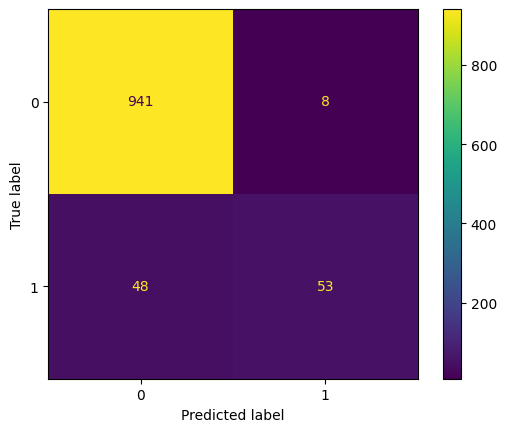

In [21]:
#random forset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predict on test data
y_train_pred_rf = rf_model.predict(X_train_vec)
y_test_pred_rf = rf_model.predict(X_test_vec)

# Calculate accuracy
train_accuracy = accuracy_score(y_train,y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

rf_acc = test_accuracy


# Evaluate model
print("📌 Random Forest Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred_rf))
print("\n")

print("Confusion Matrix")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_vec, y_test)
print("\n")


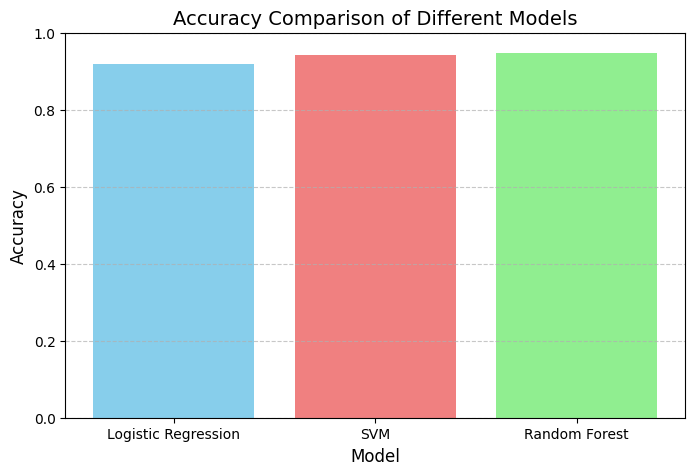

In [22]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [log_reg_acc, svm_acc, rf_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Accuracy Comparison of Different Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
